<a href="https://colab.research.google.com/github/missZina/-Neural-networks-practice/blob/master/Handwritten_Digit_Recognition_Systems_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Handwritten Digit Recognition Systems using Neural Networks
#Overview and selection criteria
The aim of this work is to develop and  experiment a simple neural network and multilayer neural network and convolutional Neural Network (CNN) to recognize and predict handwritten digits from 0 to 9. A dataset of 60000 samples were obtained from MNIST. Our work divided on three phases:
	Phase one:  we develop and experiment three handwritten digits recognition solutions.
	Phase two:  we compare these 3differents neural networks and observing their performance. 
	Phase three:  we observe the system performance by set of variation :
-	Addition of hidden layers to model1& increase the training steps number.
-	 Increase of iterations number and batch size to model 2.
-	 Addition of keras library to model3. 
-	Change the dataset to enhance the study of neural networks for given a trial observation.

# Single Neural Network
The model is a simple neural network with one hidden layer connected to pixel vector for reduced images have an input value of 784 pixels. A rectifier activation function is used for the neurons in the hidden layer. Finally, the output variable is an integer from 0 to 9 with a SoftMax activation function, where the output layer turns the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction.

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
INFO:tensorflow:Using default config.
INFO:

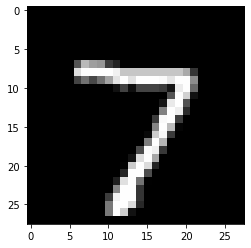

Model prediction: 7


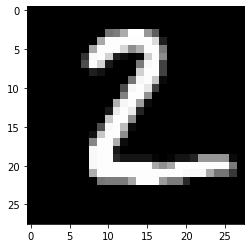

Model prediction: 2


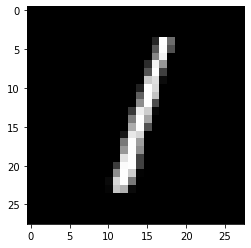

Model prediction: 1


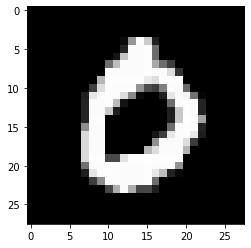

Model prediction: 0


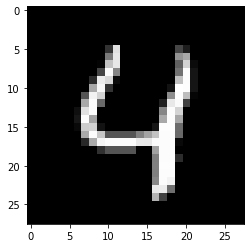

Model prediction: 4


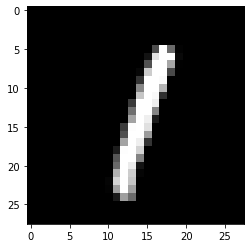

Model prediction: 1


In [1]:
#Single neural network with one layer only using softmax as function and GradientDescentOptimizer

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

# Parameters
learning_rate = 0.1
num_steps = 2000
batch_size = 128


# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

# Define the neural network
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
   
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_1, num_classes)
    return out_layer
  # Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net(features)
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
       # training, evaluating operations
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs
  
  # Build the Estimator
model = tf.estimator.Estimator(model_fn)

# Train the Model
model.train(input_fn, steps=num_steps)
 
 
# Evaluate the Model & Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)
# Predict single images
n_images = 6
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
 


# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])

#Model 2 : Multilayer neural network
The  deep learning implementation in Keras follows the below pipeline to  get a clear sense of what we are going to achieve through Deep Learning.
DL Pipline:

-Analyse Data
-Prepare the Dataset
-Create the Model
-Compile the Model
-Fit the Model
-Evaluate the Model
#Model Creation 
We will use a simple  multilayer neural network model with 784 input neurons. Two hidden layers are used with 256 neurons in hidden layer 1 and 256 neurons in hidden layer 2, followed by a fully connected layer of 10 neurons for taking the probabilities of all the class labels.
ReLU is used as the activation function for hidden layers and softmax is used as the activation function for output layer.
We are still allowed to tune these parameters (called as hyperparameters) based on the model’s performance. In fact there are algorithms to get the best possible hyper-parameters for our model which could be read.


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.





Train on 60000 samples, validate on 10000 samples
Epoch 1/20





 - 5s - loss: 0.3123 - acc: 0.9069 - val_loss: 0.1234 - val_acc: 0.9631
Epoch 2/20
 - 5s - loss: 0.1289 - acc: 0.9615 - val_loss: 0.0902 - val_acc: 0.9705
Epoch 3/20
 - 5s - loss: 0.0941 - acc: 0.9711 - val_loss: 0.0717 - val_acc: 0.9787
Epoch 4/20
 - 5s - loss: 0.0736 - acc: 0.9773 - val_loss: 0.0749 - val_acc: 0.9754
Epoch 5/20
 - 5s - loss: 0.0625 - acc: 0.9801 - val_loss: 0.0719 - val_acc: 0.9783
Epoch 6/20
 - 5s - loss: 0.0529 - acc: 0.9832 - val_loss: 0.0625 - val_acc: 0.9797
Epoch 7/20
 - 5s - loss: 0.0458 - acc: 0.9855 - val_loss: 0.0626 - val_acc: 0.9821
Epoch 8/20
 - 5s - loss: 0.0405 - acc: 0.9865 - val_loss: 0.0576 - val_acc: 0.9827
Epoch 9/20
 - 5s - loss: 0.0384 - acc: 0.9873 - val_loss: 0.0611 - val_acc: 0.9825
Epoch 10/20
 - 5s - loss: 0.0332 - acc: 0.9888 - val_loss: 0.0695 - val_acc: 0.9798
Epoch 11/20
 - 5s - loss: 0.0305 - acc: 0.9900 - val_loss: 0.0690 - val_acc: 0.9806
Epoch 12/20
 - 5s - loss: 0

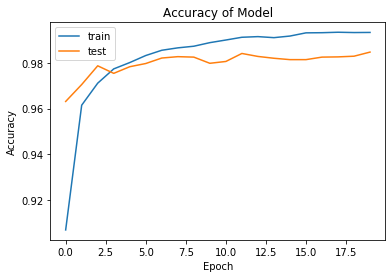

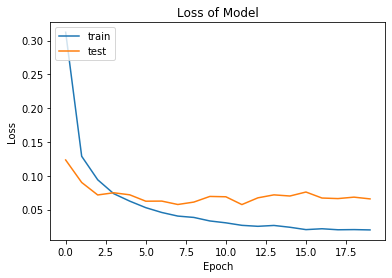

[INFO] test score - 0.0658658425272154
[INFO] test accuracy - 0.9847
[INFO] test images shape - (1, 28, 28)
[INFO] the digit is - 2


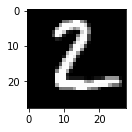

In [2]:
# Multi-Layer Perceptron (MLP) in Keras. acc+loss for train //val_loss+val_acc for test

#  imports
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils import np_utils

# fix a random seed for reproducibility
np.random.seed(9)

# user inputs
nb_epoch = 20
num_classes = 10
batch_size = 128
train_size = 60000
test_size = 10000
v_length = 784

# split the mnist data into train and test
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()


# reshape the dataset
trainData = trainData.reshape(train_size, v_length)
testData = testData.reshape(test_size, v_length)
trainData = trainData.astype("float32")
testData = testData.astype("float32")
trainData /= 255
testData /= 255


# convert class vectors to binary class matrices --> one-hot encoding
mTrainLabels = np_utils.to_categorical(trainLabels, num_classes)
mTestLabels = np_utils.to_categorical(testLabels, num_classes)

# model Creation 
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

# model sumary
model.summary()

# model compilation 
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# fit the model
history = model.fit(trainData, mTrainLabels, validation_data=(testData, mTestLabels), batch_size=batch_size, nb_epoch=nb_epoch, verbose=2)

# print the history keys
print(history.history.keys())

# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Accuracy of Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# history plot for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss of Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# print the results
print("[INFO] test score - {}".format(scores[0]))
print("[INFO] test accuracy - {}".format(scores[1]))

import matplotlib.pyplot as plt

# grab some test images from the test data
test_images = testData[1:2]

# reshape the test images to standard 28x28 format
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print("[INFO] test images shape - {}".format(test_images.shape))

# loop over each of the test images
for i, test_image in enumerate(test_images, start=1):
	# grab a copy of test image for viewing
	org_image = test_image
	
	# reshape the test image to [1x784] format so that our model understands
	test_image = test_image.reshape(1,784)
	
	# make prediction on test image using our trained model
	prediction = model.predict_classes(test_image, verbose=0)
	
	# display the prediction and image
	print("[INFO] the digit is - {}".format(prediction[0]))
	plt.subplot(220+i)
	plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

#Model 3 Convolutional  neural network
-Input
-Convolution1
-Pooling 1 
-Convolution 2
-Pooling 2
-Flatten Filter
-Fully Connected Layer
#           Network Parameters    
-Convolution Layer 1 with 64 filters and a kernel size of 3
-Max Pooling with strides of 2 and kernel size of 2
-Convolution Layer  2 with 32 filters and a kernel size of 5
-Max Pooling  with strides of 2 and kernel size of 2
-fully connected layer of 10 neurons

#Model creation 
Our third model  is CNN with 3 hidden layers .The first hidden layer is the convolution layer 1 which is responsible for features extraction from input data. This layer performs Convolution operation to small localized area by convolving a filter with the next layer. It consists of multiple features maps with learnable kernels and rectified linear unit (RELU ). The kernel  size determines the locality of the filters.
Convolution Layer 1 with 64 filters and a kernel size of 3.
Convolution Layer 2 with 32 filters and a kernel size of 5.
Relu is used as an activation function at the end of each convolution layer as well a fully connected layer enhance the performance of the model. Between every convolution layer we use a pooling layer to reduce an output  information from convolution layer and reduce the number of parameters and computational complexity of the model.


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpq1eu8uae', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdb6c253e80>, '_task_type': 'worker', '_task_id': 0, '_gl

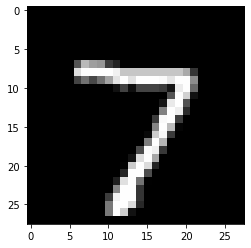

Model prediction: 7


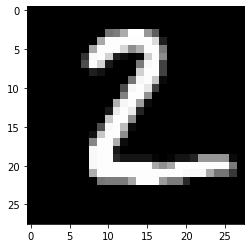

Model prediction: 2


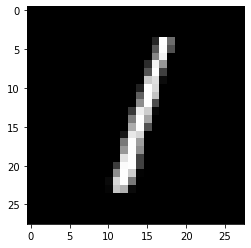

Model prediction: 1


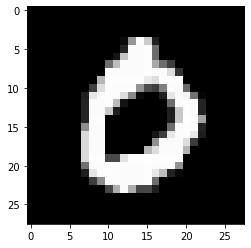

Model prediction: 0


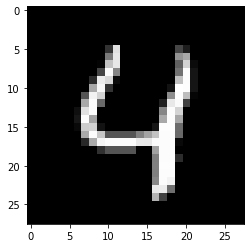

Model prediction: 4


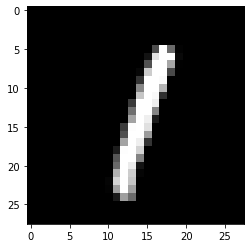

Model prediction: 1


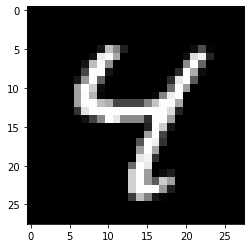

Model prediction: 4


In [3]:
from __future__ import division, print_function, absolute_import
import numpy as np
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)
import matplotlib.pyplot as plt
import tensorflow as tf
# Training Parameters
learning_rate = 0.001
num_steps = 500
batch_size = 128
# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.25 # Dropout, probability to drop a unit


# Create the neural network
def conv_net(x_dict, n_classes, dropout, reuse, is_training):
    # Define a scope for reusing the variables
    with tf.variable_scope('ConvNet', reuse=reuse):
        # TF Estimator input is a dict, in case of multiple inputs
        x = x_dict['images']

        # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
        # Reshape to match picture format [Height x Width x Channel]
        # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
        x = tf.reshape(x, shape=[-1, 28, 28, 1])
        # Convolution Layer with 64 filters and a kernel size of 3
        conv1 = tf.layers.conv2d(x, 64, 3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)
        # Convolution Layer with 32 filters and a kernel size of 5
        conv2 = tf.layers.conv2d(conv1, 32, 5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)
        # Flatten the data to a 1-D vector for the fully connected layer
        fc1 = tf.contrib.layers.flatten(conv2)
        # Fully connected layer (in tf contrib folder for now)
        fc1 = tf.layers.dense(fc1, 1024)
        # Apply Dropout (if is_training is False, dropout is not applied)
        fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training)
        # Output layer, class prediction
        out = tf.layers.dense(fc1, n_classes)

    return out
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    # Because Dropout have different behavior at training and prediction time, we
    # need to create 2 distinct computation graphs that still share the same weights.
    logits_train = conv_net(features, num_classes, dropout, reuse=False,
                            is_training=True)
    logits_test = conv_net(features, num_classes, dropout, reuse=True,
                           is_training=False)
    # Predictions
    pred_classes = tf.argmax(logits_test, axis=1)
    pred_probas = tf.nn.softmax(logits_test)
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)
        # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op,
                                  global_step=tf.train.get_global_step())
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})
    return estim_specs
# Build the Estimator
model = tf.estimator.Estimator(model_fn)
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)
# Train the Model
model.train(input_fn, steps=num_steps)
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
e = model.evaluate(input_fn)
print("Testing Accuracy:", e['accuracy'])
# Predict single images
n_images = 7
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))
# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i]) 


#Model Results 
#Model 1 : Single neural network 

Our first model is with very simple architecture only one layer without any addition of powerful library like keras .In first time we trained this model for1000 step and we obtained the following result:

   
 Model 1:	step= 1000	RunningTime=14.98s	 Accuracy=0.9179  	loss=0.2901 //
 global step 2000: accuracy = 0.9176, global_step = 2000, loss = 0.28117016


#Model 2 : Multilayer neural network with keras 
In our second neural network we used keras which give more performance to our Model.
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. It allows for easy and fast prototyping (through user friendliness, modularity, and extensibility). Supports both convolutional networks and recurrent networks, as well as combinations of the two.
We get that result :

epochs = 20 loss: 0.0200 - acc: 0.9933 

#Model 3 :  Convolutional neural netwok
the Architecture of Convolutional Network that we  implemented with parameters details and we obtained 0.9851 accuracy for 1000 number of training step and 0.988 accuracy for 2000 number of step that real demonstrates the power of this network and it fiability 
# Models Comparison 	

three solutions for digit handwritten using many architectures .we starts with a simple combination of parameters (one hidden layer with input data extracted from MNIST). We used as activation function the well-known Softmax, as optimizer GradientDescent. Then we looked to improve our experimentation and improve the system performance. We trained the Multilayer network with 2 hidden layers using keras which is more efficient .the accuracy is increased from 0.9179 to 0.9934 for 20 epoch.Moved to the third Model which use a convolution, it give us a good accuracy in comparison with a first models.

#how we can optimize the system performance?
#What is the impact of each parameter?






we move to the deep study of neural networks to optimize the system performance. We focused to show the importance of every parameter and their influence in the accuracy of the recognition of handwritten digits. We keep the type of solutions that used in previous SNN & MLNN & CNN.
We change some parameters for each model like number of step, increase epoch for second model, add one layer to first model .change batch size and add keras library for third model.Change the data set as enhancement of study and we reprogrammed a solution to this new dataset. We observe the variation of accuracies for each change.
To optimize the system performance and make an in-depth study of the neural networks, we worked on set of parameters change. First we took previous networks (simple neural network & multilayer nn & convolutional nn) as a reference then we program new models with new proposed parameters.
We will compile those new models and we will observe their performance.
For each model we will compare the new observed accuracies with the old ones with initial parameters.

Parameters:
-	Number of step 
-	Epoch 
-	Batch size
-	Addition of layer 
-	Addition of keras library 
-	Change of dataset 


#Observation
we observe that the accuracy for 1000 steps is 0.9179 and for 2000 steps is 
0.9207, it  means in our case that the increment of number of step increase the performance of model.

Simple architecture with  one layer only gives us acceptable accuracy of 0.9179

Change 2:
We will add one layer of 512 neurons to our first model .We will increase batch size to 200
And we variate the number of training step 500, 1000, 2000, 3000
-Simple neural network with 2 layers and the increment of batch size and step number give a good accuracy of 0.9234.
Change1: increase of bach size and step number 
 
-Model3: is a convlolutional neural network we trained for batch size of 128 with number of step 500, 1000,2000. Now we change batch size to 200 and step to 2000, 3000,4000.


This result of accuracy let us think that we don’t need other change or addition of libraries like keras or other internal change like addition of convolution layers or implement other algorithms.
What will happen if we add keras to the structure of convolutional neural network?
Change2: Addition of keras library to the convolutional neural network 
When we talk about addition of library to the structure of neural network it seems easy and only we add one instruction of code .In reality, we will reprogram a neural network code.
# model Creation  before keras 
        # Convolution Layer with 64 filters and a kernel size of 3
        conv1 = tf.layers.conv2d(x, 64, 3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv1 = tf.layers.max_pooling2d (conv1, 2, 2)
        # Convolution Layer with 32 filters and a kernel size of 5
        conv2 = tf.layers.conv2d(conv1, 32, 5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)
        # Flatten the data to a 1-D vector for the fully connected layer
        fc1 = tf.contrib.layers.flatten(conv2)
        # Fully connected layer (in tf contrib folder for now)
        fc1 = tf.layers.dense(fc1, 1024)


After addition of keras libray, the code restructured as per keras implementation. 
# create model
	model = Sequential()
	model.add(Conv2D(64, (3, 3), input_shape=(1, 28, 28), activation=’relu’))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	
            model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation=’relu’))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))

	model.add(Flatten())
	model.add(Dense(128, activation=’relu’))
	model.add(Dense(num_classes, activation=’softmax’))



as per table of CNN accuracies, The performance increase from case to case.
Simple convolution network give an acceptable accuracy of 0.9889. addition of keras reach 
0.9942 for10 epoch & 0.9971 for 20 epochs.
#Change of data set 
To enhance our neural network study and variate our experimentation to obtain exactitude of notes and rules, we changed the recognition of handwritten to the recognition of other picture and use of fashion MNIST  data set as a change of kind of data image. 
Fashion-MNIST is a dataset of Zalando’s fashion article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each instance is a 28×28 grayscale image, associated with a label.The class labels for Fashion MNIST are 10 class.






In [0]:
#Import data from Fshion mnist 
 
from keras. Datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()



#Why trying other dataset?
We trained other data set to have the trial approve for our experimentation and show the influence of datset on model networks performance.
Previously we used the MNIST dataset which contains a lot of handwritten digits. People from AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. As per them experimentation they found that:


MNIST is too easy
 -MNIST is overused.
 -MNIST can not represent modern CV tasks.
To choose the right quantity of dataset to train neural network models, we have to take on consideration those points:
                        -the type of data (digits, pictures, video, object,ex..) and the field of use.
                        -Quantity of data. 
                        -The number of records to take from the databases.
                       - The size of the sample needed to yield expected performance outcomes.
                       - The split of data for training and testing or use an alternate approach.
                       -For fashion mnist we obtained accuracy of 0.88 when used Multi-layers network-keras model.



#Result  
All results obtained in previous training of models with initiate parameters or change parameters are acceptable for our classification of Digits handwritten despite the simplicity of algorithm used for training. The reasons are the simplicity of dataset MNIST and the type of image and it characteristic.
In general, we concluded that the neural networks models are related to different types of parameters. As per our experience in this report. We classified these parameters :
- NN architecture
-Libraries
-Algorithms
-Dataset
-Input Data Type
- Training steps & epoch                           
